# 3.7 Hyperparameter Tuning

In classic machine learning, models often have parameters that are learned from the training data (such as weights in a linear regression model), and hyperparameters that are external configuration settings. Hyperparameters are not learned from the data but are set prior to the training process and can significantly impact the model's performance.

The goal of hyperparameter tuning is to find the optimal combination of hyperparameter values that maximizes the model's performance on a given dataset. This process helps fine-tune the model to achieve the best possible results and avoid overfitting or underfitting.

Hyper-parameter tuning is now ***standard*** and should be performed in every work.

Several approaches exists to hyper-parameter tuning:
* **Manual Tuning:** 
    * While more time-consuming, manual tuning involves domain experts iteratively adjusting hyperparameters based on their understanding of the problem and the model's behavior.
    * This approach can be effective when the hyperparameter space is relatively small or when there is substantial domain knowledge.
    * This is a good step for initial exploration and intuition-building experiment, but systematic approaches like described below will be required for robust assessment.
* **Grid Search:**
    * In this method, a predefined set of hyperparameter values is specified, and the model is trained and evaluated for all possible combinations.
    * While thorough, grid search can be computationally expensive, especially for a large number of hyperparameters or when the search space is extensive.
    * This method is implemented in the ```scikit-learn``` ecosystem as ```model_selection.GridSearchCV```, which uses cross-validation to train-test each model given the tested hyper-parameters.
* **Random Search:**
    * Random search involves randomly selecting combinations of hyperparameter values from a predefined distribution of hyperparameters (e.g., uniform or normal).
    * This approach is more computationally efficient than grid search, as it explores a diverse set of hyperparameter combinations.
    * The method is implement in the ```scikit-learn``` ecosystem as ```model_selection.RandomizedSearchCV```, which uses cross-validation for each  
* **Bayesian Optimization:**
    * Bayesian optimization employs probabilistic models to predict the performance of different hyperparameter configurations.
    * It adapts its search based on the results of previous evaluations, allowing it to focus on promising regions of the hyperparameter space.


    Below is a tutorial using the ```digits``` data sets.


In [8]:
# basic tools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# dataseta
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# explore data type
data,y = digits["data"].copy(),digits["target"].copy()
print(type(data[0][:]),type(y[0]))
# note that we do not modify the raw data that is stored on the digits dictionary.

<class 'numpy.ndarray'> <class 'numpy.int64'>


Plot the data

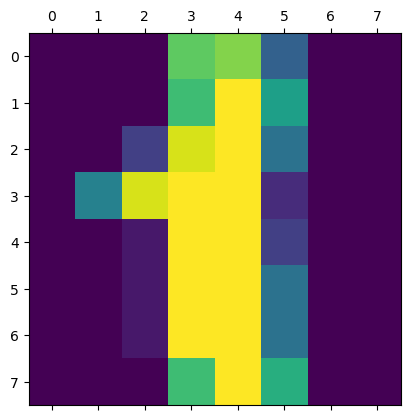

In [7]:
plt.matshow(digits["images"][1])

In [9]:
print(min(data[0]),max(data[0]))
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
scaler.fit_transform(data)# fit the model for data normalization
newdata = scaler.transform(data) # transform the data. watch that data was converted to a numpy array

# Split data into 50% train and 50% test subsets
print(f"There are {data.shape[0]} data samples")
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.2, shuffle=False)


0.0 15.0
There are 1797 data samples


In [10]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# Support Vector Machine classifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train) # learn
knn_prediction = clf.predict(X_test) # predict on test
print("SVC Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=knn_prediction))


SVC Accuracy: 0.9666666666666667


what are the parameters we are trying to optimize?

In [11]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

A search consists of:

* an estimator (regressor or classifier such as ``KNN()``);

* a parameter space;

* a method for searching or sampling candidates (grid search or random selection);

* a cross-validation scheme; and

* a loss function or a scoring metrics.


## 1. Grid Search cross validation. 
Performs the search in the brute-force way using cross-validation. One has to define the parameter space. The scikit-learn function is ``GridSearchCV``. More details [here](!https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).



In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform','distance'], 'algorithm': [ 'ball_tree', 'kd_tree'],
   'metric':['euclidean','manhattan','chebyshev','minkowski']}
 ]

The algorithm will search for all combinations of parameters, which can be from the model algorithms or the choice of features.

In [13]:
search = GridSearchCV(clf, param_grid, cv=5,verbose=3)

In [14]:
search.fit(X_train, y_train) # learn

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.948 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.983 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.965 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, weights=distance;, score=0.948 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, weights=distance;, score=0.983 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, weights=distance;, score=0.983 total time=   0.0s
[CV 4/

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree'],
                          'metric': ['euclidean', 'manhattan', 'chebyshev',
                                     'minkowski'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [15]:
search.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 3,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(n_neighbors=3),
 'n_jobs': None,
 'param_grid': [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
   'weights': ['uniform', 'distance'],
   'algorithm': ['ball_tree', 'kd_tree'],
   'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 3}

In [16]:
search.cv_results_

{'mean_fit_time': array([0.00140777, 0.00114398, 0.00129838, 0.0011826 , 0.00129204,
        0.00114655, 0.00126467, 0.00125222, 0.00126867, 0.00128045,
        0.00125637, 0.00133281, 0.00118542, 0.0012094 , 0.00116515,
        0.00115423, 0.00118184, 0.00118876, 0.00122461, 0.00118771,
        0.00127654, 0.00118356, 0.00120368, 0.00111895, 0.0011518 ,
        0.00119176, 0.00112505, 0.00120587, 0.00110974, 0.00117784,
        0.0011219 , 0.00117283, 0.00113697, 0.00110488, 0.00116277,
        0.001121  , 0.00116334, 0.00110974, 0.00115099, 0.00111418,
        0.00137367, 0.00133452, 0.00137486, 0.00139213, 0.00138397,
        0.0013628 , 0.00139284, 0.00134025, 0.00137854, 0.00140023,
        0.00136886, 0.00139098, 0.00155859, 0.00141668, 0.00142055,
        0.00144706, 0.00151439, 0.00139289, 0.00139799, 0.00144835,
        0.00118885, 0.00134029, 0.00118823, 0.00122175, 0.001193  ,
        0.00112891, 0.00116839, 0.00116444, 0.00124407, 0.00117974,
        0.00123711, 0.00120039,

In [17]:
search.best_params_

{'algorithm': 'ball_tree',
 'metric': 'euclidean',
 'n_neighbors': 1,
 'weights': 'uniform'}

## 2. Random Search Cross Validation.
It performs the search in the brute-force way using cross-validation. One has to define the parameter space. The scikit-learn function is ``GridSearchCV``. More details [here](!https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

The advantage is that it can be used for a wide hyperparameter space and limit to ``n_iter`` number of iterations.

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import  randint


distributions= [ {'n_neighbors': randint.rvs(low=1,high=10,size=10), 'weights': ['uniform','distance'], 'algorithm': [ 'ball_tree', 'kd_tree'],
                  'metric':['euclidean','manhattan','chebyshev','minkowski']} ]
clf2 = RandomizedSearchCV(clf, distributions, random_state=0,cv=5,n_iter=100)
clf2.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
                   n_iter=100,
                   param_distributions=[{'algorithm': ['ball_tree', 'kd_tree'],
                                         'metric': ['euclidean', 'manhattan',
                                                    'chebyshev', 'minkowski'],
                                         'n_neighbors': array([5, 4, 2, 8, 2, 6, 1, 1, 3, 5]),
                                         'weights': ['uniform', 'distance']}],
                   random_state=0)

In [21]:
print(search.best_params_)
print(clf2.best_params_)

{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
{'weights': 'distance', 'n_neighbors': 2, 'metric': 'euclidean', 'algorithm': 'kd_tree'}
